In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# dataset
df=pd.read_csv("Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df.shape

(200, 5)

In [6]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [7]:
# checking for null values
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [8]:
# dropping a column
df=df.drop(columns="Unnamed: 0")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# Visualising the data

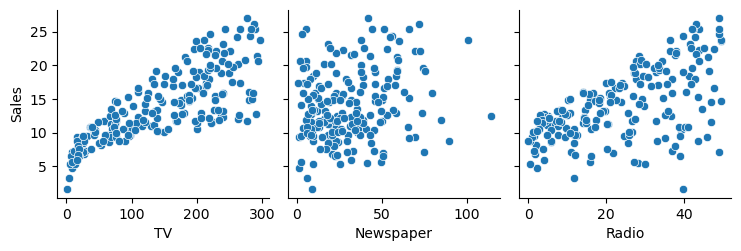

In [9]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', kind='scatter')
plt.show()

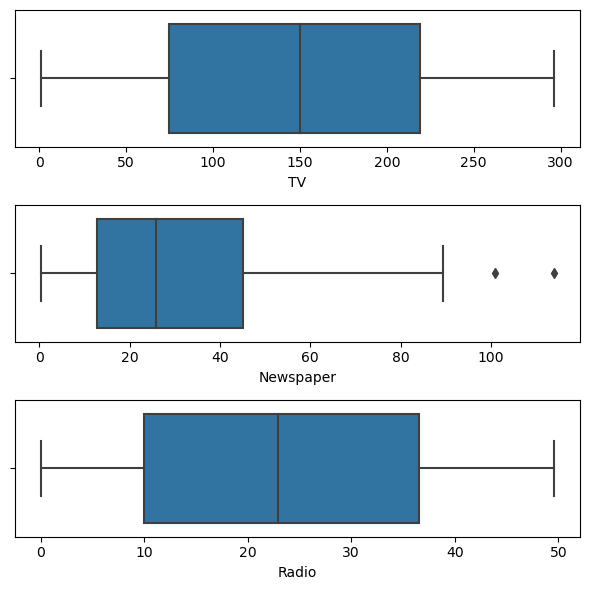

In [10]:
fig, axs = plt.subplots(3, figsize=(6,6))
plt1 = sns.boxplot(x=df['TV'],ax=axs[0])
plt2 = sns.boxplot(x=df['Newspaper'],ax=axs[1])
plt3 = sns.boxplot(x=df['Radio'],ax=axs[2])
plt.tight_layout()
plt.show()

**TV and Radio has no outliers. Newspaper has 2 outliers**

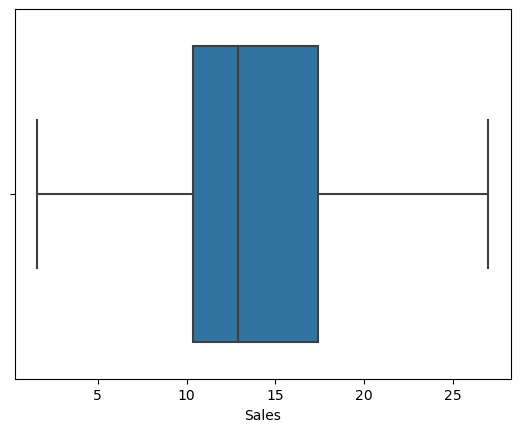

In [11]:
sns.boxplot(df['Sales'])
plt.show()

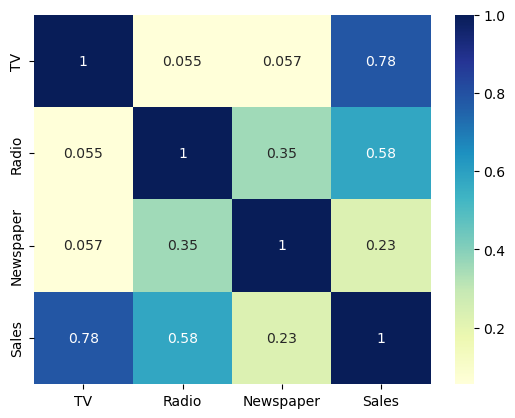

In [12]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

**By observing the heatmap, TV seems to be most correlated with Sales**

# Spliting the data into training and testing set

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df[['TV']],df[['Sales']], test_size=0.33,random_state=0)

In [14]:
print(x_train)

        TV
54   262.7
163  163.5
51   100.4
86    76.3
139  184.9
..     ...
67   139.3
192   17.2
117   76.4
47   239.9
172   19.6

[134 rows x 1 columns]


In [15]:
print(y_train)

     Sales
54    20.2
163   18.0
51    10.7
86    12.0
139   20.7
..     ...
67    13.4
192    5.9
117    9.4
47    23.2
172    7.6

[134 rows x 1 columns]


In [16]:
print(x_test)

        TV
18    69.2
170   50.0
107   90.4
98   289.7
177  170.2
..     ...
96   197.6
181  218.5
19   147.3
153  171.3
92   217.7

[66 rows x 1 columns]


In [17]:
print(y_test)

     Sales
18    11.3
170    8.4
107    8.7
98    25.4
177   11.7
..     ...
96    11.7
181   12.2
19    14.6
153   19.0
92    19.4

[66 rows x 1 columns]


# Logistic Regression

In [19]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [20]:
# model prediction
pre=model.predict(x_test)

In [21]:
model.coef_

array([[0.04697058]])

In [22]:
model.intercept_

array([7.21054755])

In [23]:
0.04697058*69.2+7.21054755

10.460911686

In [24]:
import statsmodels.api as sm

In [25]:
x_train_sm=sm.add_constant(x_train)
lr=sm.OLS(y_train,x_train_sm).fit()
lr.params

const    7.210548
TV       0.046971
dtype: float64

In [26]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     181.7
Date:                Sat, 14 Oct 2023   Prob (F-statistic):           1.40e-26
Time:                        21:05:43   Log-Likelihood:                -353.81
No. Observations:                 134   AIC:                             711.6
Df Residuals:                     132   BIC:                             717.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2105      0.605     11.917      0.0

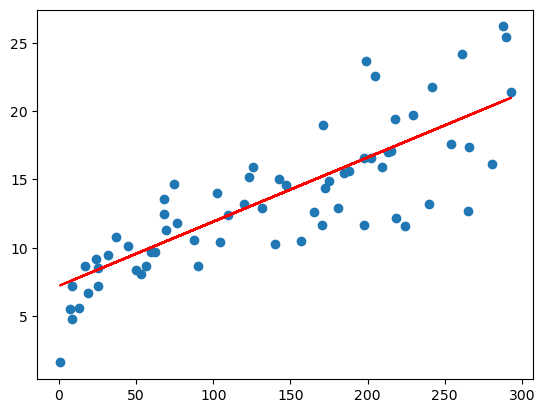

In [27]:
plt.scatter(x_test, y_test)
plt.plot(x_test, 7.210548 + 0.0470*x_test, 'r')
plt.show()